## MNIST

### Dense Layers

In [1]:
# Importing necessary libraries
import numpy as np
import tensorflow as tf
from keras import layers, models
from keras.utils import to_categorical
from keras.datasets import mnist

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build the neural network model
model = models.Sequential()
model.add(layers.Dense(512, activation="relu", input_shape=(28 * 28,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation="softmax"))

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# # Train the model
# model.fit(train_images, train_labels, epochs=5, batch_size=128, validation_split=0.2)

# # Evaluate the model on the test set
# test_loss, test_acc = model.evaluate(test_images, test_labels)
# print(f"Test accuracy: {test_acc}")

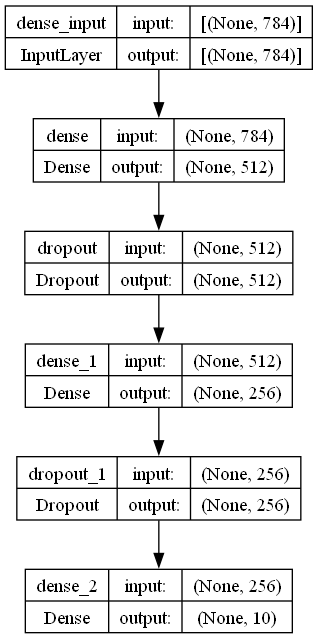

In [2]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

### ConvNet

In [3]:
# Importing necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST dataset (download it if not already present)
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1)).astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype("float32") / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build the neural network model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# # Train the model
# model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

# # Evaluate the model on the test set
# test_loss, test_acc = model.evaluate(test_images, test_labels)
# print(f"Test accuracy: {test_acc}")

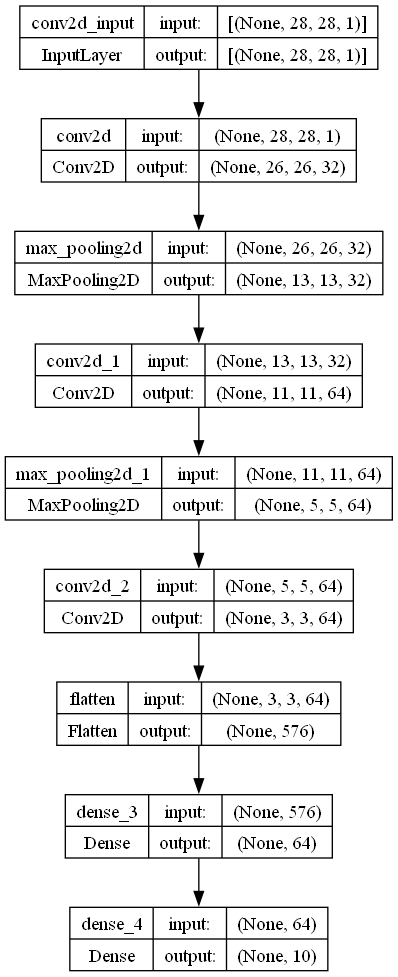

In [4]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

## CIFAR10

In [5]:
import os
import tarfile
import pickle
import numpy as np
import tensorflow as tf
from keras import layers, models
from keras.utils import to_categorical


def load_cifar10_data(folder):
    all_train_images, all_train_labels = [], []

    # Load training data from all batches
    for batch_num in range(1, 6):
        batch_filename = f"{folder}/data_batch_{batch_num}"
        with open(batch_filename, "rb") as fo:
            batch = pickle.load(fo, encoding="bytes")
            train_images = batch[b"data"]
            train_labels = np.array(batch[b"labels"])

            all_train_images.append(train_images)
            all_train_labels.append(train_labels)

    # Load test data
    with open(f"{folder}/test_batch", "rb") as fo:
        batch = pickle.load(fo, encoding="bytes")
        test_images = batch[b"data"]
        test_labels = np.array(batch[b"labels"])

    # Concatenate data from all batches
    train_images = np.concatenate(all_train_images, axis=0)
    train_labels = np.concatenate(all_train_labels, axis=0)

    return (train_images, train_labels), (test_images, test_labels)


(train_images, train_labels), (test_images, test_labels) = load_cifar10_data(
    "./cifar10/"
)
train_images = train_images.astype("float32") / 255
test_images = test_images.astype("float32") / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### Dense Layers

In [6]:
# Build the neural network model
model_ann = models.Sequential()
model_ann.add(layers.Dense(512, activation="relu", input_shape=(32 * 32 * 3,)))
model_ann.add(layers.Dropout(0.5))
model_ann.add(layers.Dense(256, activation="relu"))
model_ann.add(layers.Dropout(0.5))
model_ann.add(layers.Dense(10, activation="softmax"))

# Compile the model
model_ann.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

# # Train the model
# model_ann.fit(
#     train_images, train_labels, epochs=5, batch_size=128, validation_split=0.2
# )

# # Evaluate the model on the test set
# test_loss_ann, test_acc_ann = model_ann.evaluate(test_images, test_labels)
# print(f"Test accuracy (ANN): {test_acc_ann}")

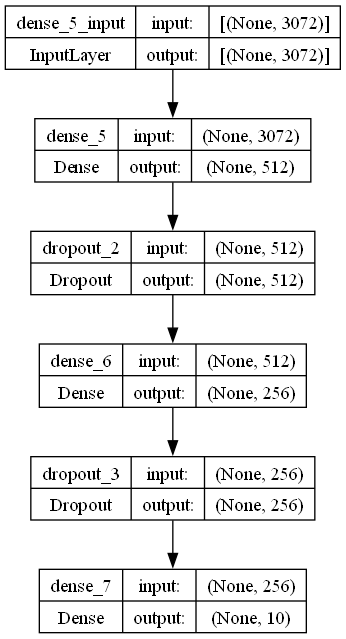

In [7]:
tf.keras.utils.plot_model(model_ann, show_shapes=True, show_layer_names=True)

### ConvNet

In [8]:
# Reshape images to (32, 32, 3)
train_images = train_images.reshape((train_images.shape[0], 32, 32, 3))
test_images = test_images.reshape((test_images.shape[0], 32, 32, 3))

# Build the convolutional neural network model
model_cnn = models.Sequential()
model_cnn.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)))
model_cnn.add(layers.MaxPooling2D((2, 2)))
model_cnn.add(layers.Conv2D(64, (3, 3), activation="relu"))
model_cnn.add(layers.MaxPooling2D((2, 2)))
model_cnn.add(layers.Conv2D(64, (3, 3), activation="relu"))
model_cnn.add(layers.Flatten())
model_cnn.add(layers.Dense(64, activation="relu"))
model_cnn.add(layers.Dense(10, activation="softmax"))

# Compile the model
model_cnn.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

# # Train the model
# model_cnn.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

# # Evaluate the model on the test set
# test_loss_cnn, test_acc_cnn = model_cnn.evaluate(test_images, test_labels)
# print(f"Test accuracy (CNN): {test_acc_cnn}")

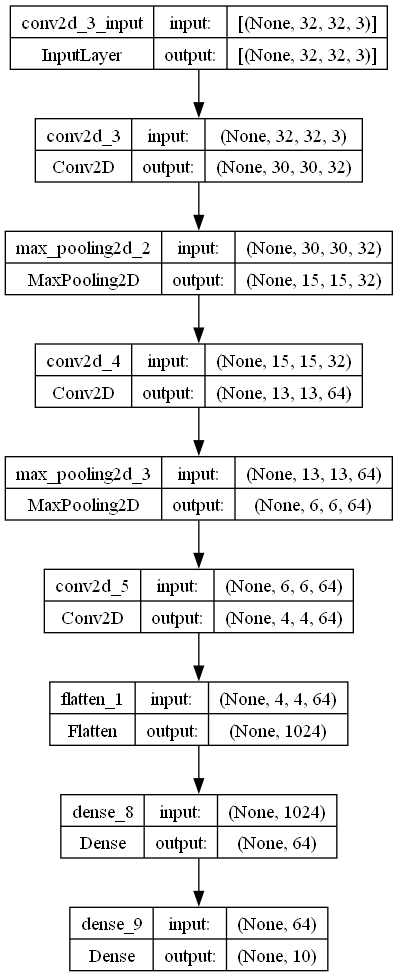

In [9]:
tf.keras.utils.plot_model(model_cnn, show_shapes=True, show_layer_names=True)

### ResNet

In [10]:
train_images = train_images.reshape((train_images.shape[0], 32, 32, 3))
test_images = test_images.reshape((test_images.shape[0], 32, 32, 3))
# ResNet18
import numpy as np
import tensorflow as tf
from keras.layers import Input, Conv2D, MaxPooling2D, Add, Activation, Flatten, Dense
from keras.models import Model


def residual_block(x, filters, stride):
    shortcut = x
    x = Conv2D(
        filters=filters,
        kernel_size=(3, 3),
        strides=stride,
        padding="same",
        activation="relu",
    )(x)
    x = Conv2D(filters=filters, kernel_size=(3, 3), padding="same")(x)
    # Skip connection
    if stride > 1 or shortcut.shape[-1] != filters:
        shortcut = Conv2D(
            filters=filters, kernel_size=(1, 1), strides=stride, padding="same"
        )(shortcut)
    x = Add()([shortcut, x])
    x = Activation("relu")(x)
    return x


def resnet18(input_shape, num_classes):
    input = Input(shape=input_shape)
    x = Conv2D(
        filters=64,
        kernel_size=(7, 7),
        strides=(2, 2),
        padding="same",
        activation="relu",
    )(input)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding="same")(x)
    # Residual blocks
    x = residual_block(x, filters=64, stride=1)
    x = residual_block(x, filters=64, stride=1)
    x = residual_block(x, filters=128, stride=2)
    x = residual_block(x, filters=128, stride=1)
    x = residual_block(x, filters=256, stride=2)
    x = residual_block(x, filters=256, stride=1)
    x = residual_block(x, filters=512, stride=2)
    x = residual_block(x, filters=512, stride=1)
    # Output layers
    x = Flatten()(x)
    x = Dense(units=num_classes, activation="softmax")(x)
    model = Model(inputs=input, outputs=x)
    return model


input_shape = (32, 32, 3)
model = resnet18(input_shape, 10)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
# model.fit(train_images, train_labels, epochs=1, batch_size=64, validation_split=0.2)
# # Evaluate the model on the test set
# test_loss_cnn, test_acc_cnn = model.evaluate(test_images, test_labels)
# print(f'Test accuracy (CNN): {test_acc_cnn}')

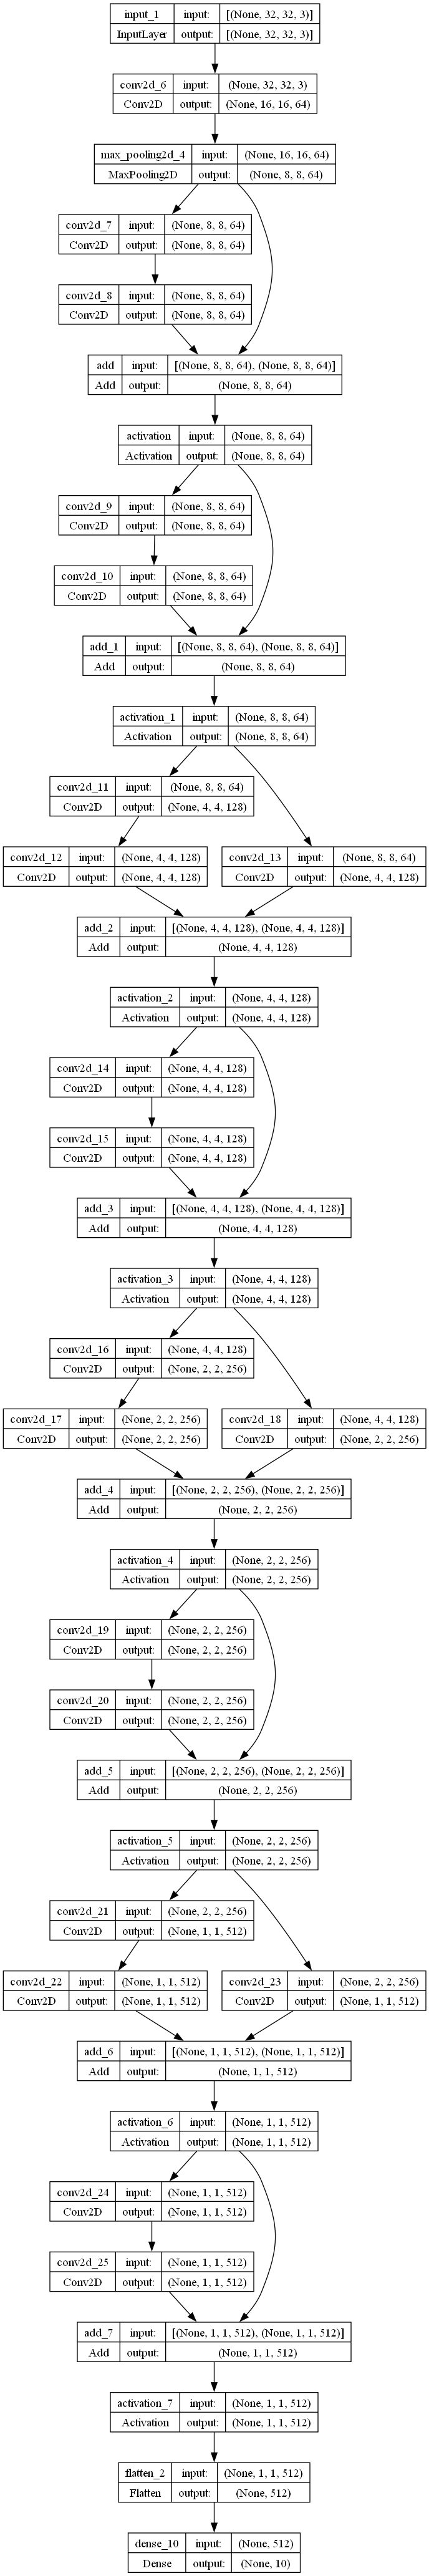

In [11]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

## U-Net (Autoencoder / Encoder-Decoder)

In [1]:
# Signal Denoising
import numpy as np
import tensorflow as tf
import librosa
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from keras.layers import Input, Conv1D, MaxPooling1D, UpSampling1D, concatenate
from keras.losses import MeanSquaredError


def create_frames(data, frame_size, hop_size):
    num_samples = len(data)
    num_frames = (num_samples - frame_size) // hop_size + 1

    frames = np.zeros((num_frames, frame_size), dtype=data.dtype)
    for i in range(num_frames):
        start = i * hop_size
        end = start + frame_size
        frames[i] = data[start:end]

    return frames


# Load and preprocess audio data
def load_and_preprocess_data(audio_path, sr=48000):
    audio, _ = librosa.load(audio_path, sr=sr, mono=True)
    return audio


def wave_unet(input_shape=(None, 1)):
    # Encoder
    inputs = Input(shape=input_shape)
    conv1 = Conv1D(64, 3, activation="relu", padding="same")(inputs)
    pool1 = MaxPooling1D(pool_size=2)(conv1)

    conv2 = Conv1D(128, 3, activation="relu", padding="same")(pool1)
    pool2 = MaxPooling1D(pool_size=2)(conv2)

    conv3 = Conv1D(256, 3, activation="relu", padding="same")(pool2)
    pool3 = MaxPooling1D(pool_size=2)(conv3)

    # Bottleneck
    conv4 = Conv1D(512, 3, activation="relu", padding="same")(pool3)

    # Decoder
    up5 = UpSampling1D(size=2)(conv4)
    concat5 = concatenate([conv3, up5], axis=-1)
    conv5 = Conv1D(256, 3, activation="relu", padding="same")(concat5)

    up6 = UpSampling1D(size=2)(conv5)
    concat6 = concatenate([conv2, up6], axis=-1)
    conv6 = Conv1D(128, 3, activation="relu", padding="same")(concat6)

    up7 = UpSampling1D(size=2)(conv6)
    concat7 = concatenate([conv1, up7], axis=-1)
    conv7 = Conv1D(64, 3, activation="relu", padding="same")(concat7)

    # Output layer
    output = Conv1D(1, 1, activation="linear", padding="same")(conv7)

    model = tf.keras.Model(inputs=inputs, outputs=output, name="wave_unet")
    return model


# Load and preprocess data
path = "./raw.wav"
clean_signal = load_and_preprocess_data(path)
clean_signal = clean_signal[:100000]
max_abs_value = np.max(np.abs(clean_signal))
clean_signal = clean_signal / max_abs_value
white_noise = np.random.normal(0, 0.1, len(clean_signal))
noisy_signal = clean_signal + white_noise

# Define frame parameters
frame_size = 1024
hop_size = 512

# Create frames
clean_frames = create_frames(clean_signal, frame_size, hop_size)
noisy_frames = create_frames(noisy_signal, frame_size, hop_size)

clean_frames = np.expand_dims(clean_frames, axis=-1)
noisy_frames = np.expand_dims(noisy_frames, axis=-1)

# Build the model
model = wave_unet(input_shape=(1024, 1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError())

# # Train the model
# model.fit(noisy_frames, clean_frames, epochs=5, batch_size=4)
# # tf.keras.utils.plot_model(model,show_shapes=True,show_layer_names=True)
# # # Predict the denoised sequence
# denoised_frames = model.predict(noisy_frames)
# denoised_frames = np.squeeze(denoised_frames, axis=-1)
# clean_frames = np.squeeze(clean_frames, axis=-1)
# noisy_frames = np.squeeze(noisy_frames, axis=-1)
# predicted = denoised_frames.ravel()
# clean = clean_frames.ravel()
# noisy = noisy_frames.ravel()


# # # Visualize the results
# plt.figure()
# plt.plot(clean, label="Clean Signal")
# plt.figure()
# plt.plot(noisy, label="Noisy Signal")
# plt.figure()
# plt.plot(predicted, label="Denoised signal")
# plt.legend()
# plt.show()

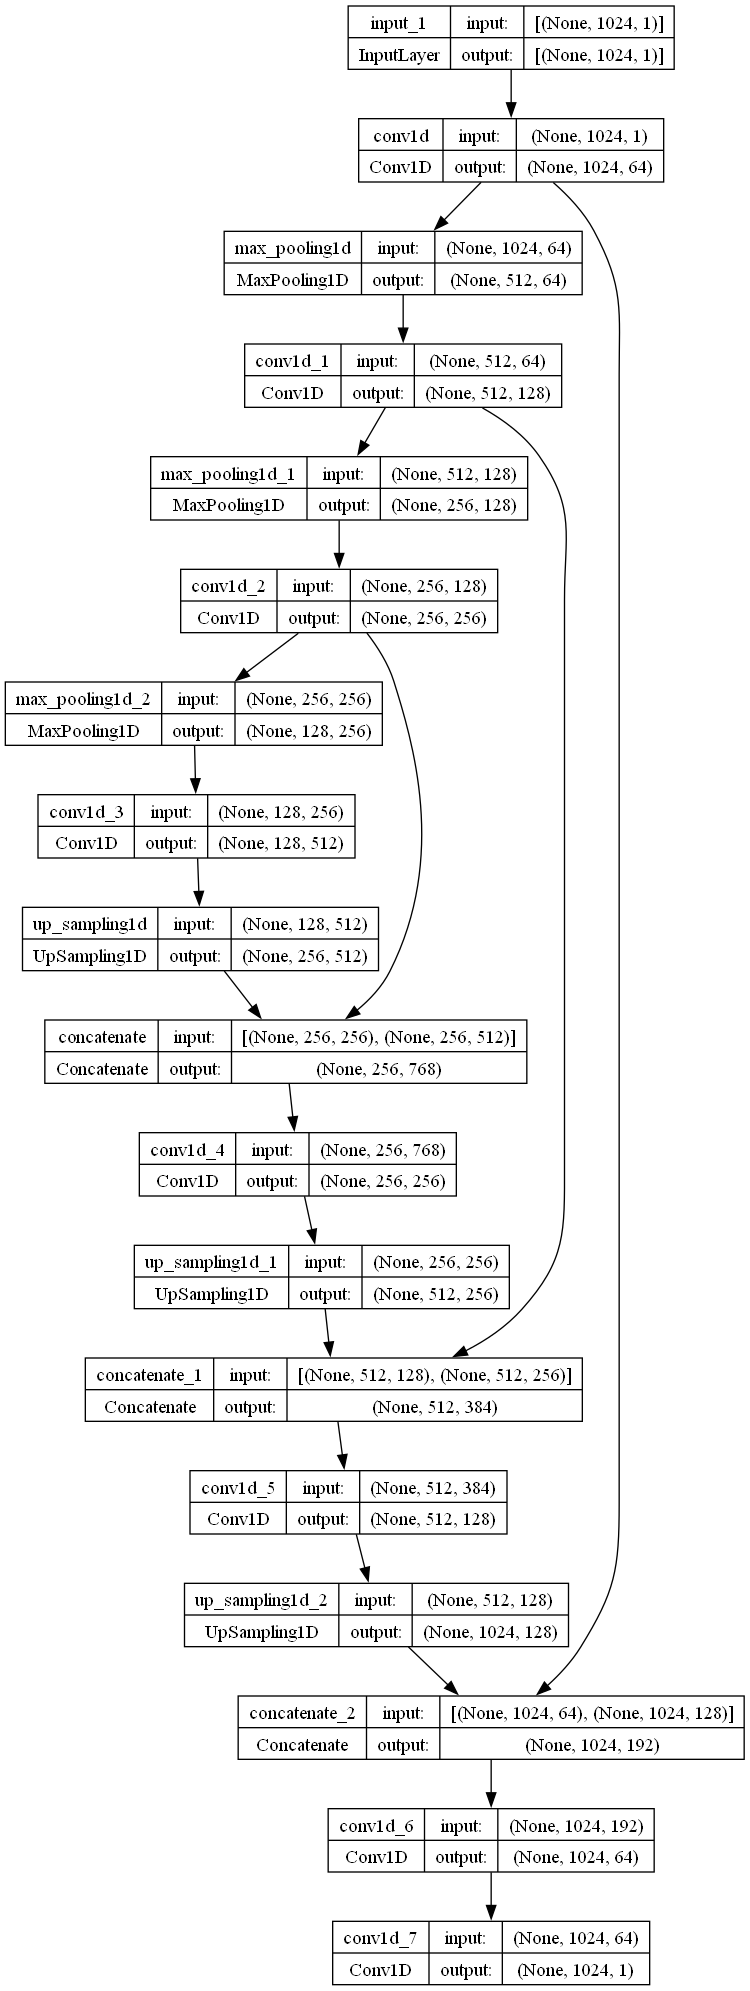

In [2]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)